In [ ]:
# Importing Libs
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("/content/tabular_dataset.csv")

In [ ]:
y = dataset["prognosis"]
x = dataset.drop(["prognosis"], axis=1)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x,y , random_state=104, test_size=0.25, shuffle=True)

In [ ]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((2708, 132), (903, 132), (2708,), (903,))

## Gaussian Naive Bayes

In [ ]:
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
pred = nb.predict(x_val)
acc = nb.score(x_val,y_val)
print(f"Naive Bayes Accuracy = {acc}")

Naive Bayes Accuracy = 0.9269102990033222


In [ ]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(x_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.03511191734215131)


In [ ]:
y_pred = nbModel_grid.predict(x_val)
acc = nbModel_grid.score(x_val,y_val)
print(f"Naive Bayes Accuracy = {acc}")

Naive Bayes Accuracy = 0.9324473975636767


## Multi-layer Perceptron classifier

In [ ]:
mlp = MLPClassifier()
mlp.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [ ]:
pred = mlp.predict(x_val)
acc = mlp.score(x_val,y_val)
print(f"MLP Accuracy = {acc}")

MLP Accuracy = 0.946843853820598


## k-Nearest Neighbors

In [ ]:
train_score = {}
test_score = {}
n_neighbors = np.arange(1, 30, 1)
for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(x_train, y_train)
    train_score[neighbor]=knn.score(x_train, y_train)
    test_score[neighbor]=knn.score(x_val, y_val)

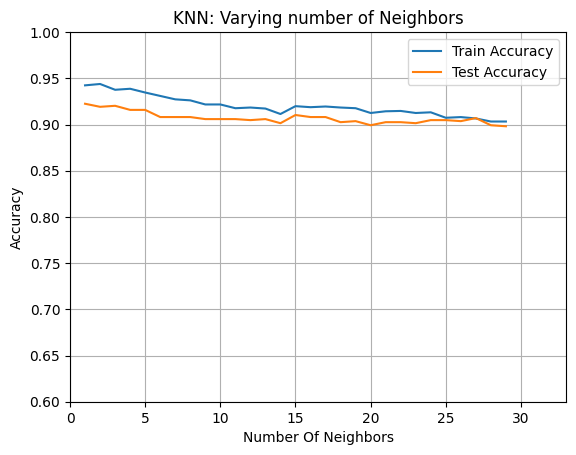

In [ ]:
plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN: Varying number of Neighbors")
plt.legend()
plt.xlim(0, 33)
plt.ylim(0.60, 1)
plt.grid()
plt.show()

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
pred = neigh.predict(x_val)
acc = neigh.score(x_val,y_val)
print(f"KNN Accuracy = {acc}")

KNN Accuracy = 0.920265780730897


## Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred = dt.predict(x_val)
acc = dt.score(x_val,y_val)
print(f"Accuracy = {acc}")

Accuracy = 0.9302325581395349


## Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
pred_rf = rf.predict(x_val)
acc_rf = rf.score(x_val,y_val)
print(f"Accuracy = {acc_rf}")

Accuracy = 0.9401993355481728


In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,210,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

rf = RandomForestClassifier()

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [ ]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])})

In [ ]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'max_features': 4, 'n_estimators': 150} with a score of 0.94


**SVC**

In [71]:
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [72]:
pred_svc = svc.predict(x_val)
acc_svc = svc.score(x_val,y_val)
print(f"Accuracy = {acc_svc}")

Accuracy = 0.9313399778516057


In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
gammas = ['scale', 'auto']
param_grid = dict(kernel=kernels, gamma=gammas)

svc_hpm = SVC()

grid = GridSearchCV(estimator=svc_hpm, param_grid=param_grid, cv=5)

In [ ]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'gamma': 'scale', 'kernel': 'linear'} with a score of 0.93


In [ ]:
tabular_columns = dataset.columns
tabular_columns = tabular_columns.drop('prognosis')

adjusted_tabular_columns = [term.replace('_', ' ') for term in tabular_columns]
print(adjusted_tabular_columns)

['itching', 'skin rash', 'nodal skin eruptions', 'continuous sneezing', 'shivering', 'chills', 'joint pain', 'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting', 'vomiting', 'burning micturition', 'spotting urination', 'fatigue', 'weight gain', 'anxiety', 'cold hands and feets', 'mood swings', 'weight loss', 'restlessness', 'lethargy', 'patches in throat', 'irregular sugar level', 'cough', 'high fever', 'sunken eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish skin', 'dark urine', 'nausea', 'loss of appetite', 'pain behind the eyes', 'back pain', 'constipation', 'abdominal pain', 'diarrhoea', 'mild fever', 'yellow urine', 'yellowing of eyes', 'acute liver failure', 'fluid overload', 'swelling of stomach', 'swelled lymph nodes', 'malaise', 'blurred and distorted vision', 'phlegm', 'throat irritation', 'redness of eyes', 'sinus pressure', 'runny nose', 'congestion', 'chest pain', 'weakness in limbs', 'fast heart rate', 'pain during bowe

In [ ]:
val = 'I have been having a lot of problems with my skin. It is constantly peeling and I have developed rashes on my arms. It is really itchy and it is making my life miserable.'
val_lower = val.lower()

vector = [1 if any(term in val_lower for term in column.split()) else 0 for column in adjusted_tabular_columns]
vector = np.array(vector)
print(len(vector))
print(vector)

132
[0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0]


In [ ]:
vector_array = np.array(vector).reshape(1, -1)

In [73]:
from joblib import dump

# Save the model to disk
dump(nbModel_grid, 'GaussianNB_gridsearch.joblib')
dump(mlp, 'mlp.joblib')
dump(neigh, 'k-Nearest.joblib')
dump(dt, 'Decision Tree.joblib')
dump(grid, 'Random.joblib')
dump(svc, 'SVC.joblib')

['SVC.joblib']

In [ ]:
#GaussianNB
y_pred = nbModel_grid.predict(vector_array)
print(y_pred)

#MLP
pred = mlp.predict(vector_array)
print(pred)

#k-Nearest Neighbors
pred = neigh.predict(vector_array)
print(pred)

#Decision Tree
pred = dt.predict(vector_array)
print(pred)

#Random Forest
pred_rf = grid.predict(vector_array)
print(pred_rf)

#SVC
pred_svc = svc.predict(vector_array)
print(pred_svc)

['Psoriasis']
['Psoriasis']
['Psoriasis']
['Psoriasis']
['Psoriasis']
['Dengue']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SV